In [1]:
import numpy as np 
import scipy 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.integrate import quad 
from scipy.optimize import brentq, newton, ridder, bisect
%matplotlib inline

In [2]:
def log_theta_prime(h,q, eps = 1e-6):
    '''Derivative of log of the modified error function. 
        Enters into the computation for the saddle 
        point equation for q'''
    var = h/np.sqrt(2*(1-q))
    prefactor = np.sqrt(2/(np.pi*(1-q)))
    den = np.sqrt(np.pi)
    if (scipy.special.erf(var) +1.0 <= eps):
        series = -1.*den*var - den/(2*var) + den/(2*var*var*var) - 5*den/(4*var**5)
        return prefactor*series
    else:
        return prefactor/(2*np.exp(var*var) - scipy.special.erfcx(var))
# def log_theta_modified_2(h,q):
#     var = h/np.sqrt(2*(1-q))
#     prefactor = np.sqrt(2/(np.pi*(1-q)))
#     return prefactor*np.exp(-var*var)/(1+scipy.special.erf(var))
# def log_theta_modified_3(h,q):
#     var = h/np.sqrt(2*(1-q))
#     prefactor = np.sqrt(2/(np.pi*(1-q)))
#     return prefactor/(-1.0*np.real((np.exp(var*var) - scipy.special.wofz(-1j*var))) + scipy.special.erfcx(var))


In [3]:
def log_theta_double_prime(h,q):
    ''' Second derivative of log of the modified error 
        function. Enters into the computation for the 
        instability line in the SAT Phase'''
    return -1.*log_theta_prime(h,q)*(h/(1-q) + log_theta_prime(h,q))


In [4]:
def integrand1(h,q, chi, sigma = 0.0):
    ''' Integrand for the saddle point equation for q'''
    prefactor = 1./(np.sqrt(2*np.pi*(q+sigma))) 
    num = np.exp(-((h+chi)**2) / (2*(q+sigma)))
    return prefactor*num*log_theta_prime(h,q)**2

def integrand2(h,q,chi, sigma = 0.0):
    ''' Integrand for the instability line for q'''
    prefactor = 1./(np.sqrt(2*np.pi*(q+sigma))) 
    num = np.exp(-((h+chi)**2) / (2*(q+sigma)))
    return prefactor*num*log_theta_double_prime(h,q)**2

In [203]:
def func_to_solve_SAT(q,m,chi,lower_lim = -0.5, upper_lim = 0.5, sigma = 0.0):
    ''' Function whose root gives us the value of q satisfying the 
        saddle point and instability equations. Given m, chi and sigma'''
#     return (q-m**2)-((quad(integrand2, lower_lim, upper_lim, args=(q,chi))[0]) / (quad(integrand1, lower_lim, upper_lim, args=(q,chi))[0]))
    return ((q-m**2)*(quad(integrand2, lower_lim, upper_lim, args=(q,chi))[0]))- (quad(integrand1, lower_lim, upper_lim, args=(q,chi))[0])

In [445]:
m = 0.0
rates = [2.0, 3.0, 4.0, 5.0]
q_range = np.arange(0.01, 0.6, 0.001)
chi = -1.5
print chi
# vals = [func_to_solve_SAT(q,m,chi, chi-rate*np.sqrt(q), chi+rate*np.sqrt(q)) for q in q_range]

-1.5


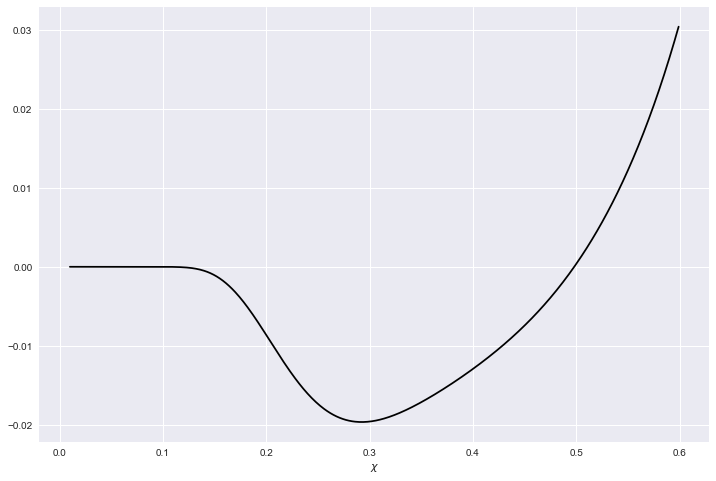

In [446]:
plt.figure(figsize = (12,8))
plt.xlabel(r'$\chi$')
plt.plot(#          q_range, [func_to_solve_SAT(q,m,chi, chi-rates[1]*np.sqrt(q), chi+rates[1]*np.sqrt(q)) for q in q_range], 'b',
#          q_range, [func_to_solve_SAT(q,m,chi, chi-rates[2]*np.sqrt(q), chi+rates[2]*np.sqrt(q)) for q in q_range], 'g',
         q_range, [func_to_solve_SAT(q,m,chi, chi-rates[3]*np.sqrt(q), chi+rates[3]*np.sqrt(q)) for q in q_range], 'k')

In [480]:
m = 0.9
guess = 0.99999
print compute_chi(m)


-2.53163271234


In [486]:
rate = 3.0
chi = -3.0
sol = 0.99999
sigma = 0.0
tol = 1e-10
eps = 1e-4
print tol
args = (m, chi, -1.0*rate*np.sqrt(guess) +chi, rate*np.sqrt(guess)+chi,sigma)
new_guess = brentq(func_to_solve_SAT,0.4, sol ,args = args, maxiter=10000)
print new_guess
while (np.abs(new_guess - guess) > tol):
    guess = new_guess
    new_guess = brentq(func_to_solve_SAT, 0.4,sol, args = (m, chi, -1.0*rate*np.sqrt(guess) +chi, rate*np.sqrt(guess)+chi, 
                                                     sigma), maxiter=5000)
#     new_guess =newton(func_to_solve_SAT,sol, args = (m, chi, -rate*np.sqrt(guess) + chi,rate*np.sqrt(guess)+chi, sigma), maxiter= 10000)
    print guess, new_guess, np.abs(new_guess-guess), func_to_solve_SAT(new_guess, m, chi,-1.0*rate*np.sqrt(new_guess) +chi, rate*np.sqrt(new_guess)+chi,sigma)
print func_to_solve_SAT(new_guess, m, chi,-1.0*rate*np.sqrt(new_guess) +chi, rate*np.sqrt(new_guess)+chi,sigma )

1e-10
0.997048334357
8.99287755374e-10


In [496]:
def compute_q_sol(m,chi, chi_limit=-0.1, guess = 0.99999, sigma = 0.0, tol = 1e-10, rate = 3.0):
    sol = 0.99999
    args = (m, chi, -1.0*rate*np.sqrt(guess) +chi, rate*np.sqrt(guess)+chi,sigma)
    new_guess = brentq(func_to_solve_SAT,0.4,sol ,args = args, maxiter=10000)
#     print new_guess, func_to_solve_SAT(new_guess, m, chi, -1.0*rate*np.sqrt(new_guess) +chi, rate*np.sqrt(new_guess)+chi,sigma)
    while (np.abs(new_guess - guess) > tol):
        guess = new_guess
        args = (m, chi, -rate*np.sqrt(guess) + chi, rate*np.sqrt(guess)+chi, sigma)
        #     new_guess = brentq(func_to_solve_SAT, 0.5, new_guess, args = (m, chi, -1.0*rate*np.sqrt(guess) +chi, rate*np.sqrt(guess)+chi, 
        #                                                      sigma), maxiter=5000)
        new_guess =brentq(func_to_solve_SAT,0.4, sol, args = args, maxiter= 10000)
#         print guess, new_guess, np.abs(new_guess-guess), func_to_solve_SAT(new_guess, m, chi,-1.0*rate*np.sqrt(new_guess) +chi, rate*np.sqrt(new_guess)+chi,sigma)
        
    return [new_guess,func_to_solve_SAT(new_guess, m, chi,-1.0*rate*np.sqrt(new_guess) +chi,rate*np.sqrt(new_guess)+chi,sigma)]

In [504]:
m = 0.1
chi_range = np.arange(-3.0, compute_chi(m)+0.1, 0.1)

In [505]:
print " this is x {}".format(2)

 this is x 2


In [506]:
q_sols = []
for chi in chi_range:
    print "Computing for chi = {}".format(chi)
    x = compute_q_sol(m, chi)[0]
    q_sols.append(x)

Computing for chi = -3.0
Computing for chi = -2.9
Computing for chi = -2.8
Computing for chi = -2.7
Computing for chi = -2.6
Computing for chi = -2.5
Computing for chi = -2.4
Computing for chi = -2.3
Computing for chi = -2.2
Computing for chi = -2.1
Computing for chi = -2.0
Computing for chi = -1.9
Computing for chi = -1.8
Computing for chi = -1.7
Computing for chi = -1.6
Computing for chi = -1.5
Computing for chi = -1.4
Computing for chi = -1.3
Computing for chi = -1.2
Computing for chi = -1.1
Computing for chi = -1.0
Computing for chi = -0.9
Computing for chi = -0.8
Computing for chi = -0.7
Computing for chi = -0.6
Computing for chi = -0.5
Computing for chi = -0.4
Computing for chi = -0.3
Computing for chi = -0.2
Computing for chi = -0.1
Computing for chi = 2.6645352591e-15


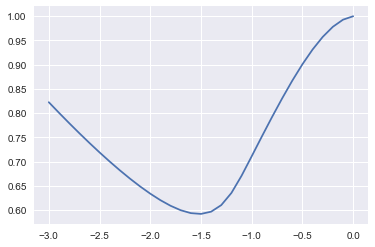

In [507]:
plt.plot(chi_range, q_sols)

In [445]:
eps = 1e-2
index = np.where(np.abs(np.asarray(vals))<=eps)
possible_sols = q_range[index]
possible_vals = np.asarray(vals)[index]

In [429]:
print possible_sols
print possible_vals

[ 0.856]
[ 0.0042048]


## Variation of solution with the lower and upper limits of integration 

In [280]:
chi_1 = 0.0
chi_2 = -1.0
chi_3 = -2.5
limits = np.arange(0.5, 10.0, 0.01)
sols_1 = []
sols_2 = []
sols_3 = []
sigma = 0.0
for limit in limits:
    lower_lim = -1.0*limit
    upper_lim = limit
    sols_1.append(newton(func_to_solve_SAT, 0.9, args = (m, chi_1, lower_lim, upper_lim, sigma), 
                         maxiter=5000))
    sols_2.append(newton(func_to_solve_SAT, 0.9, args = (m, chi_2, lower_lim, upper_lim , sigma), 
                         maxiter=5000))
    sols_3.append(newton(func_to_solve_SAT, 0.9, args = (m, chi_3, lower_lim , upper_lim, sigma), 
                         maxiter=5000))
sols_1 = np.asarray(sols_1)
sols_2 = np.asarray(sols_2)
sols_3 = np.asarray(sols_3)

RuntimeError: Failed to converge after 5000 iterations, value is nan

In [ ]:
plt.plot(limits, sols_1 ,'r', limits, sols_2, 'b', limits, sols_3, 'g')

In [271]:
func_to_solve_SAT(q,m,chi, lower_lim, upper_lim)

-2.0590817939591943e-10

In [272]:
def instability_q_SAT(chi_range, m, guess = 0.5, lower_lim, upper_lim, sigma = 0.0):
    ''' Returns the instability line in the SAT phase 
        over a range of values of chi'''
    q_sol = []
    for chi in chi_range:
        q_sol.append(newton(func_to_solve_SAT, guess, args = (m, chi, lower_lim, upper_lim, sigma),maxiter=5000))
#         q_sol.append(brentq(func_to_solve_SAT, 0.1, 0.99, args = (m, chi, sigma)))
    return np.asarray(q_sol)

SyntaxError: non-default argument follows default argument (<ipython-input-272-fa61024fd034>, line 1)

In [208]:
chi_range = np.arange(-3.0, 0.0, 0.01)
q_sol = instability_q_SAT(chi_range, 0.0)

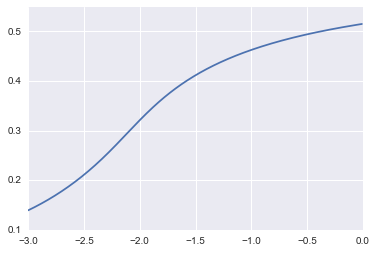

In [209]:
plt.plot(chi_range, q_sol)

In [210]:
def instability_alpha_SAT_val(chi,m,low_lim = -5., upper_lim = 5.,sigma = 0.0):
    q = newton(func_to_solve_SAT, 0.99, args = (m,chi, sigma), maxiter=500)
#     q = brentq(func_to_solve_SAT, 0.1, 0.99, args = (m, chi, sigma))
    lhs = (q-m**2)/(1-q)**2
    rhs = quad(integrand1, low_lim, upper_lim, args = (q,chi))[0]
    return lhs/rhs

In [508]:
def instability_alpha_SAT_1(chi_range, q_range, m, low_lim = -5., upper_lim=5., sigma = 0.0):
    ''' Returns the alpha vs chi curve which defines the instabilty 
        for the SAT phase. This function uses the saddle point equation
        to compute the value of alpha'''
    alpha = []
    if (len(q_range) == 0):
        q_range = instability_q_SAT(chi_range, m, sigma)
    for i in range(len(q_range)):
        lhs = (q_range[i]-m**2)/((1-q_range[i])**2)
        rhs = quad(integrand1, 0, np.inf, args = (q_range[i],chi_range[i]))[0]
        alpha.append(lhs/rhs)
    return np.asarray(alpha)

In [509]:
def jamming_integrand(h,chi, sigma = 0.0):
    ''' Integrand which enters for the computation of the 
        jamming line'''
    den = 1.0/np.sqrt(2*np.pi*(1+sigma))
    fun = np.exp(-(h*h)/(2*(1+sigma)))
    fac = (h-chi)**2
    return fun*fac*den

def standard_integrand(h, chi, sigma):
    ''' Integrand for the second integral entering 
        the computation for the UNSAT instability'''
    den = 1.0/np.sqrt(2*np.pi*(1+sigma))
    fun = np.exp(-(h*h)/(2*(1+sigma)))
    return den*fun

In [510]:
def func_to_solve_UNSAT(chi,m, sigma = 0.0):
    ''' Function to compute the value of '''
    return (1-m**2)*(quad(standard_integrand, -np.inf, chi, args = (chi, sigma))[0]) - quad(jamming_integrand, -np.inf, 
                                                                                            chi, args = (chi, sigma))[0]

def compute_chi(m, sigma = 0.0):
    return newton(func_to_solve_UNSAT, 0.0, args = (m, sigma))
#     return brentq(func_to_solve_UNSAT, -4.0, 3.0, args = (m, sigma))
    

def compute_alpha_J(chi, m, sigma = 0.0):
    ''' Computes a particular value on the jamming line 
        for a given value of chi and m'''
    integral = quad(jamming_integrand, -np.inf, chi, args = (chi,sigma))
    return (1-m**2)/integral[0]    
    
def jamming_line(chi_range, m, sigma = 0.0):
    ''' Computes the jamming line for a range of values of chi'''
    alpha = []
    for chi in chi_range:
        integral = quad(jamming_integrand, -np.inf, chi, args = (chi, sigma))
        alpha.append((1-m**2)/integral[0])
    return np.asarray(alpha)

In [511]:
compute_chi(0.1)

-0.012605232410454578

In [214]:
m1 = 0.0
m2 = 0.5
chi_range = np.arange(-3.0, 0.0, 0.01)
q_range_1 = instability_q_SAT(chi_range,m1, guess = 0.8) 
q_range_2 = instability_q_SAT(chi_range, m2, guess = 0.8)

In [215]:
alpha_1_m1 = instability_alpha_SAT_1(chi_range, q_range_1, m1)
alpha_1_m2 = instability_alpha_SAT_1(chi_range, q_range_2, m2)
# alpha_2_m1 = instability_alpha_SAT_2(chi_range, q_range_1, m1)
# alpha_2_m2 = instability_alpha_SAT_2(chi_range, q_range_2, m2)
alpha_J_m1 = jamming_line(chi_range, m1)
alpha_J_m2 = jamming_line(chi_range, m2)

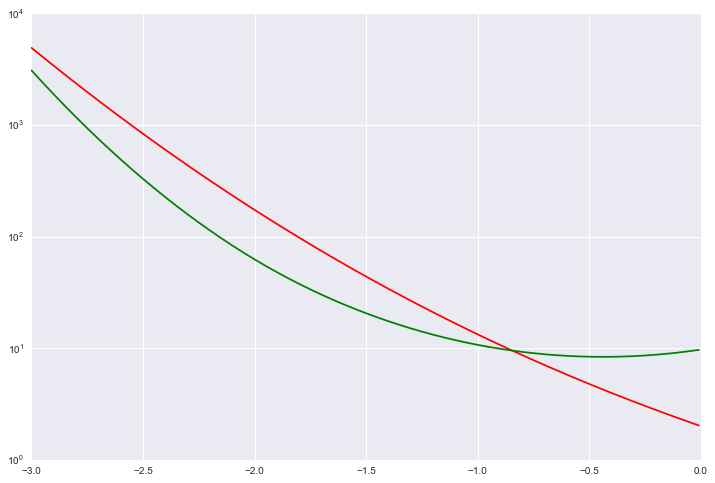

In [216]:
plt.figure(figsize = (12,8))
plt.semilogy(chi_range, alpha_J_m1, 'r-')
# plt.semilogy(chi_range, alpha_J_m2, 'r-.')
# plt.semilogy(chi_range, alpha_1_m1, 'b-')
# plt.semilogy(chi_range, alpha_1_m2, 'b-.')
plt.semilogy(chi_range, alpha_1_m1, 'g-')
# plt.semilogy(chi_range, alpha_2_m2, 'g-.')

In [331]:
h_range = np.arange(-2.8, 1.8,0.01)
q = 0.4
chi = 0.0
sigma = 0.0
integrals_1 = [integrand1(h,q,chi,sigma) for h in h_range]
integrals_2 = [integrand2(h,q,chi, sigma) for h in h_range]

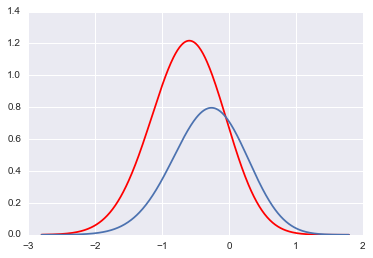

In [332]:
plt.plot(h_range, integrals_1, 'r', h_range, integrals_2)

In [255]:
h_range_2 = np.arange(0.0,10.0, 0.01)
q = 0.4
chi_1 = -2.5
chi_2 = 0.0
integral_1  = [quad(integrand2, -1.0*h, h, args = (q,chi_1,sigma))[0] for h in h_range_2]
integral_2 = [quad(integrand2, -1.0*h, h, args = (q,chi_2, sigma))[0] for h in h_range_2]

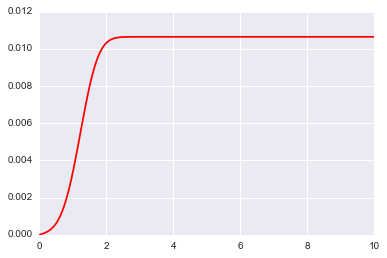

In [256]:
plt.plot(h_range_2, integral_1, 'r')

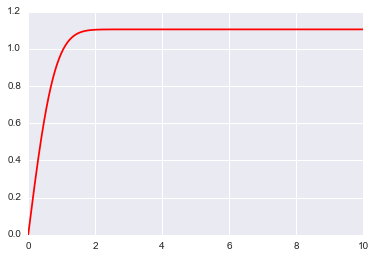

In [257]:
plt.plot(h_range_2, integral_2, 'r')